In [4]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus

In [20]:
data=pd.read_csv('PastHires.csv')
data.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [21]:
le=LabelEncoder()
print(data.columns)
data['Employed?']=le.fit_transform(data['Employed?'])
data['Level of Education']=le.fit_transform(data['Level of Education'])
data['Top-tier school']=le.fit_transform(data['Top-tier school'])
data['Interned']=le.fit_transform(data['Interned'])
data['Hired']=le.fit_transform(data['Hired'])

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')


In [22]:
x=data.iloc[:,0:6]
y=data.iloc[:,-1]

In [15]:
x.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned
0,10,1,4,0,0,0
1,0,0,0,0,1,1
2,7,0,6,0,0,0
3,2,1,1,1,1,0
4,20,0,2,2,1,0


In [16]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: Hired, dtype: int64

In [17]:
cls=tree.DecisionTreeClassifier()
cls.fit(x,y)

DecisionTreeClassifier()

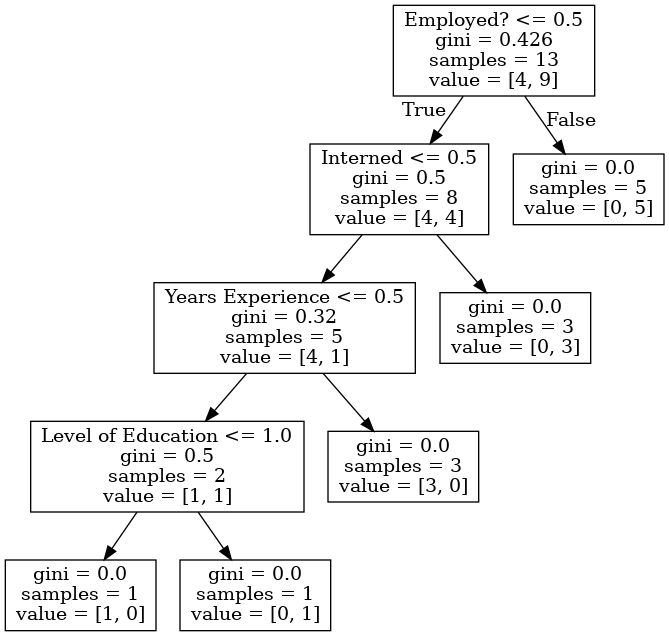

In [28]:
dot_data=StringIO()
features=list(data.columns[:6])
tree.export_graphviz(cls,out_file=dot_data,feature_names=features)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Using a Random Forest

In [30]:
cls.score(x,y)

1.0